In [ ]:
# data manipulation and visualisation
library(dplyr,quietly = TRUE)
library(tidyverse,quietly = TRUE)
# hdf5 file manipulation
library(rhdf5)
library(viridis)
library(ggplot2,quietly = TRUE)
library(reshape2,quietly = TRUE)
library(viridis,quietly = TRUE)
library(data.table,quietly = TRUE)
library(xtable,quietly = TRUE)
library(knitr)
library(markdown)
library(stringr)
library(cowplot)
library(patchwork)
source("utils/energy_Util.R")

# the package and the option to make the figures bigger in juptyer/R
library(repr)
options(repr.plot.width=14, repr.plot.height=9)

In [ ]:
sample_size=40
sample_files=c()
i=0
files=read_file_list(path="data/RAPL/")
for (file in files){
  if( file >="dahu.1561469864.hdf5.csv" & sample_size){
      print(file)
    sample_files=c(sample_files,file)
    i=i+1
  }
  if (i>=sample_size){
    break
  }
} 

In [ ]:
path="/home/salah/energy/ciment-dahu/prepoccessed_colmet/"
d_all = data.frame()
for (file_name in sample_files){
        file_path=paste0(path,file_name)
        print(file_path, col_types = cols())
        jobdata_rapl=read_csv(file_path)
        d_all=rbind(d_all,jobdata_rapl)

    }



In [5]:
d_all

hostname,timestamp_minute,timestamp,pp0/package1,DRAM/package1,pp0/package2,DRAM/package2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bigfoot1,26024506,1561470416,786069,126393,774473,101668
bigfoot1,26024507,1561470448,226862355,38104670,203855598,32374507
bigfoot1,26024508,1561470508,206063107,39043086,238060863,33163885
bigfoot1,26024509,1561470568,222369228,39051084,219928295,33170040
bigfoot1,26024510,1561470628,224497849,38945033,207778577,33087591
bigfoot1,26024511,1561470688,191202402,38770064,204763076,32629018
bigfoot1,26024512,1561470748,187845868,38771513,204633148,32569866
bigfoot1,26024513,1561470808,187458357,38829946,204587591,32520933
bigfoot1,26024514,1561470868,187428664,38766207,204624720,32602568


In [ ]:
d_oar=read_csv("data/oar/job_oar_sample.csv")
names(d_oar)=c("job_id","job_name_oar","cigri_oar","submission_time_oar","start_time_oar","stop_time_oar","walltime_oar","job_user_oar","job_gourp_oar","queue_name_oar","array_id_oar","job_type_oar","reservation","moldable_id","resource_id_oar","assigned_resource_index_oar","host_oar")
d_oar$job_name_oar=NULL
d_oar$assigned_resource_index_oar=NULL
d_oar$job_gourp_oar=NULL
d_oar$reservation=NULL
#data$hostname=str_extract(data$hostname,"[0-9]+")
d_oar$host_oar=str_extract(d_oar$host_oar,"[0-9]+")
d_oar=d_oar%>%filter(!(host_oar %in% c("1","2","3")))

d_oar=d_oar%>%mutate(core_id=(resource_id_oar-(33*32))%%32+1)
d_oar=d_oar%>%mutate(processor=ifelse(core_id<=16,2,1))
d_oar

d_gantt_proc=d_oar%>%group_by(job_id,host_oar,cigri_oar,submission_time_oar,walltime_oar,start_time_oar,stop_time_oar,processor,job_type_oar,job_user_oar)%>%
    arrange(core_id)%>%
    summarise(resource_ids_oar= paste(core_id,collapse=","),
             nb_resources=n(),
             psetmin=min(core_id),psetmax=max(core_id))



 d_gantt_proc=d_gantt_proc%>%mutate(runtime_oar=stop_time_oar-start_time_oar)
 d_gantt_proc=d_gantt_proc%>%ungroup()
 d_gantt_proc

In [7]:
sample_start=min(d_all$timestamp)
sample_end=max(d_all$timestamp)

In [8]:
draw_gantt_oar_proc <- function(workload="",title ="??",start_sample,end_sample) {
  
  
  # we read the workload 
  #print(workload)
  
  
  # Start ploting
  a= workload  %>%
    ggplot(aes( xmin=start_time_oar,
                ymin=psetmin,
                ymax=psetmax + 0.9,
                xmax=stop_time_oar,
                # here it will set the alpha globaly
                #alpha=job_id,
                fill=as.character(cigri_oar)
                )
           )  + #scale_fill_viridis(discrete=T) +
    # This draw the rectangles
    geom_rect(color="black", size=0.1) +theme(legend.position = "none")+ labs(fill='cigri id') +
    # And we add the labels of the job id
    geom_text(aes(x=start_time_oar +(stop_time_oar-start_time_oar)/2, # size=stretch,
                  y=psetmin+((psetmax-psetmin)/2)+0.5,
                  label=paste(job_id, "")), alpha=1,check_overlap = TRUE) + theme(axis.title.x=element_blank())+
    
    #xlim(sample_start-20000,sample_end+20000)+
    xlim(start_sample,end_sample)+#facet_wrap(~processor)+
    ylab("resources") + xlab("time (in seconds)") #+ggtitle(title)
  return(a)
}

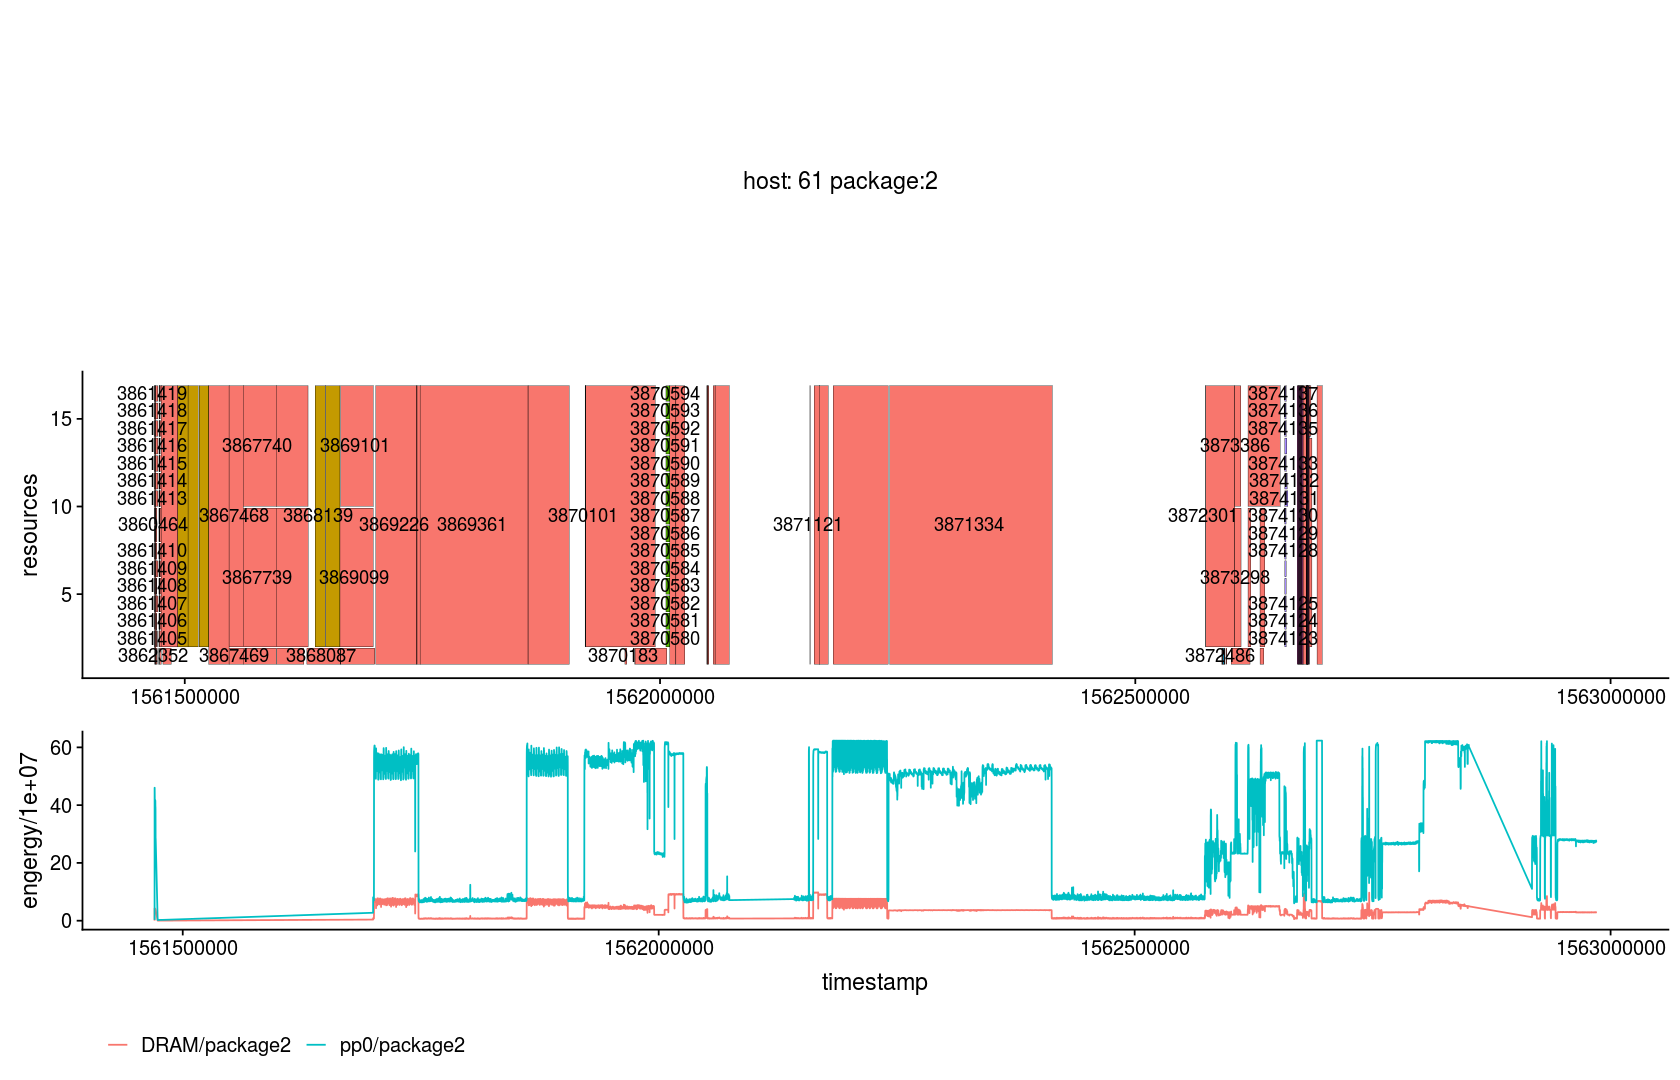

In [11]:
d_energy_visu=gather(d_all, key = "package_name", value = "engergy",
       `pp0/package1`,`DRAM/package1`,`pp0/package2`,`DRAM/package2`)

for (i in 61:61){
  
  for (pack_name in 2:2){
    tryCatch({ 
          
            
          
            host_id=as.character(i)
              title <- ggdraw() + draw_label(paste0("host: ",host_id, " package:",pack_name))
              
              d_machine_energy= d_energy_visu%>%filter(engergy>=0)%>%
                filter(hostname== paste0("dahu",host_id )& package_name %in% c( paste0("pp0/package",as.character(pack_name)),c( paste0("DRAM/package",as.character(pack_name)) ) ) ) 
              d_workload=d_gantt_proc%>%filter(host_oar== i & processor ==pack_name)
              d_study=d_workload
              #d_workload=d_study%>%filter(job_id==3873447)
              #print(d_workload)
              start_sample=min(min(d_machine_energy$timestamp), min(d_workload$start_time_oar))
              end_sample=max(max(d_machine_energy$timestamp), max(d_workload$stop_time_oar))

              f1=ggplot(data =d_machine_energy)+
                geom_line(aes(x = timestamp,y=engergy/10000000,color=package_name))+
                theme(legend.position = 'bottom',legend.title = element_blank())#+scale_x_continuous(trans = transform_x_to_date)
              
              f3=draw_gantt_oar_proc(workload =d_workload,title = "OAR" ,start_sample,end_sample)
              print(plot_grid(title,f3,f1,ncol = 1))#+ggsave(file_name,height = 8,width = 13) )
      },
                      error = function(e) { 
                               print(paste("error in visualisation ",host_id) )
                               print(e)
                               }
            )
  
  }
}